**IMPORTNG NEEDED PACKAGES**

In [ ]:

import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor



**READING DATASET**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [ ]:
house=pd.read_csv('kc_house_data.csv')

In [ ]:
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,245000.0,3,1.00,1180,5650.0,1.0,0,0,3,7,1180,0,1955,0,98155,47.5112,-122.257,1340,5650.0
1,538000.0,3,2.25,2570,7242.0,2.0,0,0,3,7,2170,400,1951,0,98125,47.7210,-122.319,1690,7639.0
2,245000.0,2,1.00,1090,10000.0,1.0,0,0,3,6,970,0,1933,0,98028,47.7279,-122.233,2720,8062.0
3,604000.0,4,3.00,1960,5000.0,1.0,0,0,4,7,1050,910,1965,0,98136,47.5208,-122.372,1360,5000.0
4,510000.0,3,2.00,1680,8080.0,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503.0


**SHAPE OF THE DATASET (ROW , COLUMN)**

In [ ]:
house.shape

(21613, 21)

**COLUMN NAMES**

In [ ]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

**INFO OF THE DATASET**

In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

**DESCRIPTION OF THE NUMERICAL ATTRIBUTES**

In [ ]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**DATASET TYPE OF EACH ATTRIBUTE**

In [ ]:
house.dtypes
# ONLY DATE IS OBJECT TYPE 

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

**NUMERICAL ATTRIBUTES**

In [ ]:
house_num=house.select_dtypes(include=['int64','float64']).copy()
house_num

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,245000.0,3,1.00,1180,5650.0,1.0,0,0,3,7,1180,0,1955,0,98155,47.5112,-122.257,1340,5650.0
1,538000.0,3,2.25,2570,7242.0,2.0,0,0,3,7,2170,400,1951,0,98125,47.7210,-122.319,1690,7639.0
2,245000.0,2,1.00,1090,10000.0,1.0,0,0,3,6,970,0,1933,0,98028,47.7279,-122.233,2720,8062.0
3,604000.0,4,3.00,1960,5000.0,1.0,0,0,4,7,1050,910,1965,0,98136,47.5208,-122.372,1360,5000.0
4,510000.0,3,2.00,1680,8080.0,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3322.2,2.0,0,0,3,8,1530,0,2007,0,98103,47.6993,-122.346,1530,3666.6
21609,400000.0,4,2.50,2310,5813.0,2.0,0,0,3,8,2310,0,2007,0,98146,47.5107,-122.362,1830,7200.0
21610,402101.0,2,1.00,1090,3322.2,2.0,0,0,3,7,1020,0,2007,0,98144,47.5944,-122.299,1256,3666.6
21611,400000.0,3,2.50,1600,3322.2,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,3666.6


# HANDLING DUPLICATE AND NULL VALUES

In [ ]:
house.duplicated().sum()

# NO DUPLICATE VALUES

0

In [ ]:
house.isnull().sum()

# NO NULL VALUES

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# HANDLING OUTLIERS

**FINDING OUTLIERS IN ALL ATTRIBUTES WITH INTER QUARTILE REGION AND VISUALIZATION BY BOXPLOT**

In [ ]:
def outlier_detection(attribute):
    for i in house.columns:
        if(house[i].dtypes=='float64' or house[i].dtypes=='int64'):
            print("Attribute: ",i)
            print(" ")
            print("Description of the attribute: ",i)
            print(" ")
            print(house[i].describe())
            print(" ")

            Q_1=house[i].quantile(0.25)
            Q_3=house[i].quantile(0.75)
            IQR=Q_3 - Q_1
            print("The Inter Quantile Range is: ",IQR)
            print(" ")
            lower_boundary = Q_1 - 1.5 * IQR
            upper_boundary = Q_3 + 1.5 * IQR
            print("The lower boundary is: ",lower_boundary)
            print(" ")
            print("The upper boundary is: ",upper_boundary)
            print(" ")

            fig=plt.figure(figsize=(8,5))
            sns.boxplot(x=house[i])
            print("Boxplot to detect the outliers: ")
            plt.show()
            print(" ")

            print("If the instances lie between " + str(lower_boundary) + " and " + str(upper_boundary) + " then they are not outliers")
            print(" ")
            print("If the instances lie below " + str(lower_boundary) + " or lie beyond " + str(upper_boundary) + " then they are outliers")
            print(" ")

Attribute:  id
 
Description of the attribute:  id
 
count    2.161300e+04
mean     4.580302e+09
std      2.876566e+09
min      1.000102e+06
25%      2.123049e+09
50%      3.904930e+09
75%      7.308900e+09
max      9.900000e+09
Name: id, dtype: float64
 
The Inter Quantile Range is:  5185851251.0
 
The lower boundary is:  -5655727682.5
 
The upper boundary is:  15087677321.5
 
Boxplot to detect the outliers: 


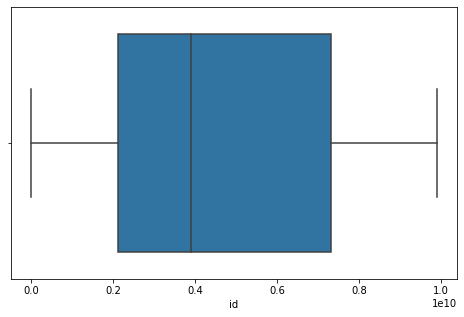

 
If the instances lie between -5655727682.5 and 15087677321.5 then they are not outliers
 
If the instances lie below -5655727682.5 or lie beyond 15087677321.5 then they are outliers
 
Attribute:  price
 
Description of the attribute:  price
 
count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64
 
The Inter Quantile Range is:  323050.0
 
The lower boundary is:  -162625.0
 
The upper boundary is:  1129575.0
 
Boxplot to detect the outliers: 


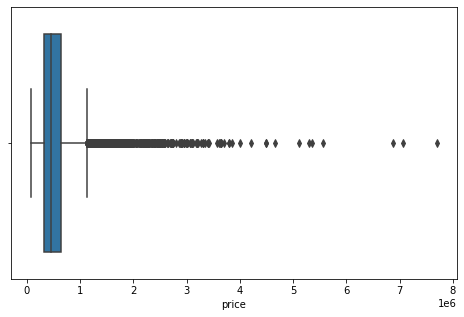

 
If the instances lie between -162625.0 and 1129575.0 then they are not outliers
 
If the instances lie below -162625.0 or lie beyond 1129575.0 then they are outliers
 
Attribute:  bedrooms
 
Description of the attribute:  bedrooms
 
count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64
 
The Inter Quantile Range is:  1.0
 
The lower boundary is:  1.5
 
The upper boundary is:  5.5
 
Boxplot to detect the outliers: 


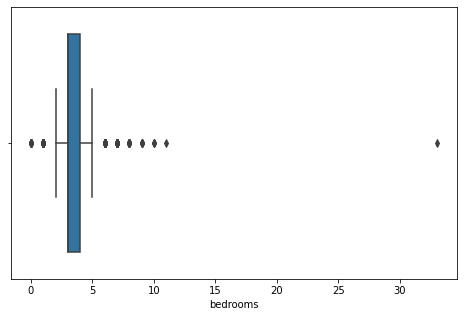

 
If the instances lie between 1.5 and 5.5 then they are not outliers
 
If the instances lie below 1.5 or lie beyond 5.5 then they are outliers
 
Attribute:  bathrooms
 
Description of the attribute:  bathrooms
 
count    21613.000000
mean         2.114757
std          0.770163
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64
 
The Inter Quantile Range is:  0.75
 
The lower boundary is:  0.625
 
The upper boundary is:  3.625
 
Boxplot to detect the outliers: 


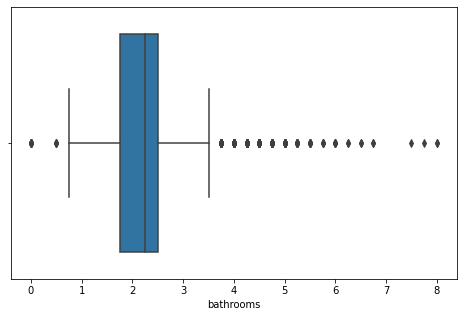

 
If the instances lie between 0.625 and 3.625 then they are not outliers
 
If the instances lie below 0.625 or lie beyond 3.625 then they are outliers
 
Attribute:  sqft_living
 
Description of the attribute:  sqft_living
 
count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64
 
The Inter Quantile Range is:  1123.0
 
The lower boundary is:  -257.5
 
The upper boundary is:  4234.5
 
Boxplot to detect the outliers: 


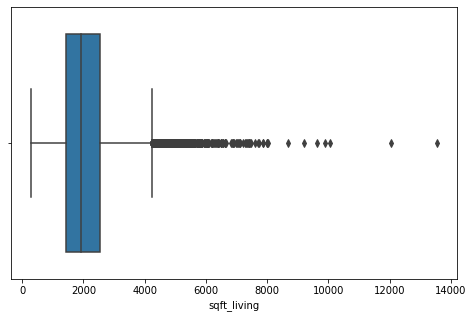

 
If the instances lie between -257.5 and 4234.5 then they are not outliers
 
If the instances lie below -257.5 or lie beyond 4234.5 then they are outliers
 
Attribute:  sqft_lot
 
Description of the attribute:  sqft_lot
 
count    2.161300e+04
mean     1.510697e+04
std      4.142051e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068800e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64
 
The Inter Quantile Range is:  5648.0
 
The lower boundary is:  -3432.0
 
The upper boundary is:  19160.0
 
Boxplot to detect the outliers: 


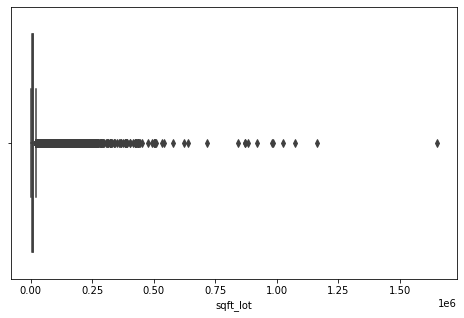

 
If the instances lie between -3432.0 and 19160.0 then they are not outliers
 
If the instances lie below -3432.0 or lie beyond 19160.0 then they are outliers
 
Attribute:  floors
 
Description of the attribute:  floors
 
count    21613.000000
mean         1.494309
std          0.539989
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64
 
The Inter Quantile Range is:  1.0
 
The lower boundary is:  -0.5
 
The upper boundary is:  3.5
 
Boxplot to detect the outliers: 


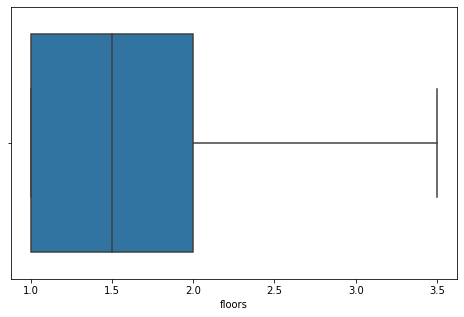

 
If the instances lie between -0.5 and 3.5 then they are not outliers
 
If the instances lie below -0.5 or lie beyond 3.5 then they are outliers
 
Attribute:  waterfront
 
Description of the attribute:  waterfront
 
count    21613.000000
mean         0.007542
std          0.086517
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64
 
The Inter Quantile Range is:  0.0
 
The lower boundary is:  0.0
 
The upper boundary is:  0.0
 
Boxplot to detect the outliers: 


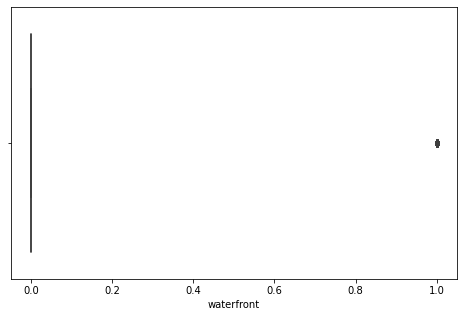

 
If the instances lie between 0.0 and 0.0 then they are not outliers
 
If the instances lie below 0.0 or lie beyond 0.0 then they are outliers
 
Attribute:  view
 
Description of the attribute:  view
 
count    21613.000000
mean         0.234303
std          0.766318
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64
 
The Inter Quantile Range is:  0.0
 
The lower boundary is:  0.0
 
The upper boundary is:  0.0
 
Boxplot to detect the outliers: 


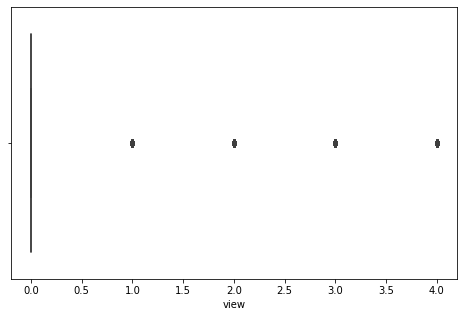

 
If the instances lie between 0.0 and 0.0 then they are not outliers
 
If the instances lie below 0.0 or lie beyond 0.0 then they are outliers
 
Attribute:  condition
 
Description of the attribute:  condition
 
count    21613.000000
mean         3.409430
std          0.650743
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64
 
The Inter Quantile Range is:  1.0
 
The lower boundary is:  1.5
 
The upper boundary is:  5.5
 
Boxplot to detect the outliers: 


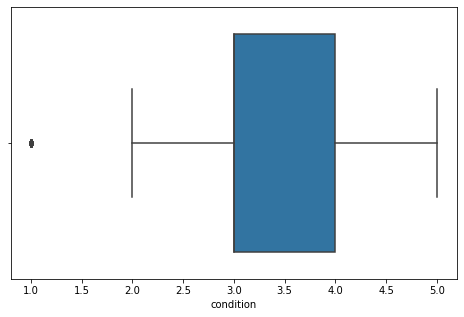

 
If the instances lie between 1.5 and 5.5 then they are not outliers
 
If the instances lie below 1.5 or lie beyond 5.5 then they are outliers
 
Attribute:  grade
 
Description of the attribute:  grade
 
count    21613.000000
mean         7.656873
std          1.175459
min          1.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64
 
The Inter Quantile Range is:  1.0
 
The lower boundary is:  5.5
 
The upper boundary is:  9.5
 
Boxplot to detect the outliers: 


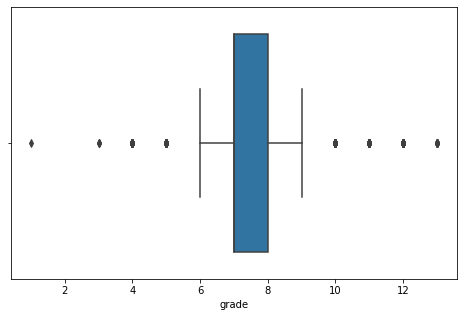

 
If the instances lie between 5.5 and 9.5 then they are not outliers
 
If the instances lie below 5.5 or lie beyond 9.5 then they are outliers
 
Attribute:  sqft_above
 
Description of the attribute:  sqft_above
 
count    21613.000000
mean      1788.390691
std        828.090978
min        290.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64
 
The Inter Quantile Range is:  1020.0
 
The lower boundary is:  -340.0
 
The upper boundary is:  3740.0
 
Boxplot to detect the outliers: 


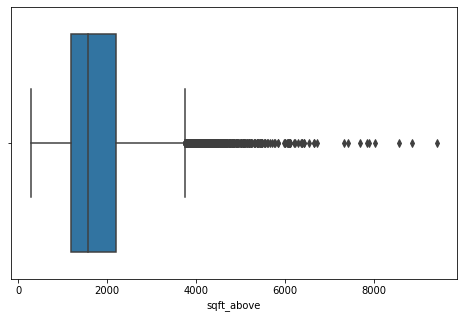

 
If the instances lie between -340.0 and 3740.0 then they are not outliers
 
If the instances lie below -340.0 or lie beyond 3740.0 then they are outliers
 
Attribute:  sqft_basement
 
Description of the attribute:  sqft_basement
 
count    21613.000000
mean       291.509045
std        442.575043
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64
 
The Inter Quantile Range is:  560.0
 
The lower boundary is:  -840.0
 
The upper boundary is:  1400.0
 
Boxplot to detect the outliers: 


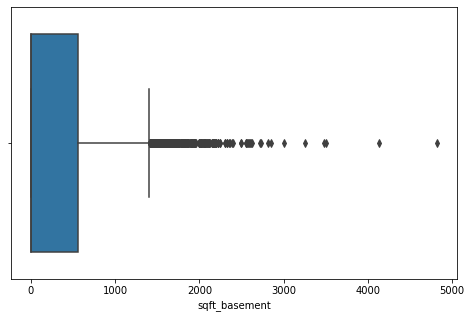

 
If the instances lie between -840.0 and 1400.0 then they are not outliers
 
If the instances lie below -840.0 or lie beyond 1400.0 then they are outliers
 
Attribute:  yr_built
 
Description of the attribute:  yr_built
 
count    21613.000000
mean      1971.005136
std         29.373411
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64
 
The Inter Quantile Range is:  46.0
 
The lower boundary is:  1882.0
 
The upper boundary is:  2066.0
 
Boxplot to detect the outliers: 


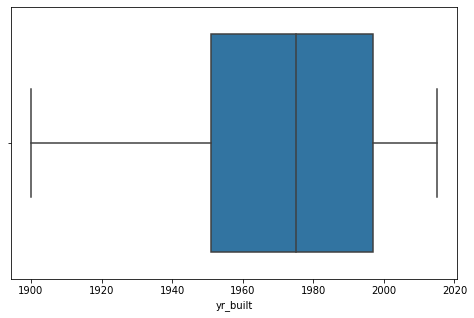

 
If the instances lie between 1882.0 and 2066.0 then they are not outliers
 
If the instances lie below 1882.0 or lie beyond 2066.0 then they are outliers
 
Attribute:  yr_renovated
 
Description of the attribute:  yr_renovated
 
count    21613.000000
mean        84.402258
std        401.679240
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64
 
The Inter Quantile Range is:  0.0
 
The lower boundary is:  0.0
 
The upper boundary is:  0.0
 
Boxplot to detect the outliers: 


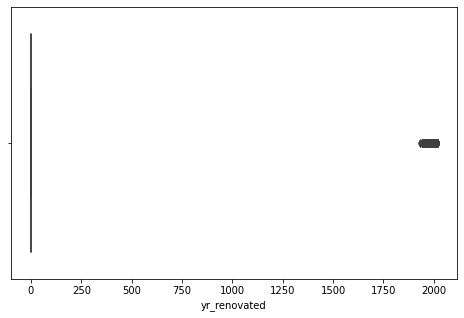

 
If the instances lie between 0.0 and 0.0 then they are not outliers
 
If the instances lie below 0.0 or lie beyond 0.0 then they are outliers
 
Attribute:  zipcode
 
Description of the attribute:  zipcode
 
count    21613.000000
mean     98077.939805
std         53.505026
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64
 
The Inter Quantile Range is:  85.0
 
The lower boundary is:  97905.5
 
The upper boundary is:  98245.5
 
Boxplot to detect the outliers: 


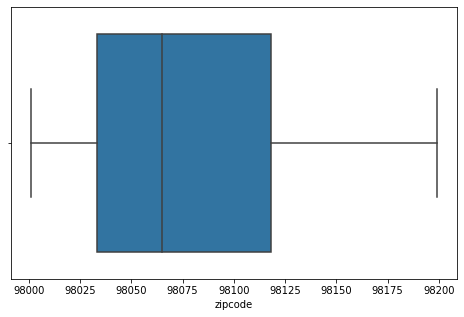

 
If the instances lie between 97905.5 and 98245.5 then they are not outliers
 
If the instances lie below 97905.5 or lie beyond 98245.5 then they are outliers
 
Attribute:  lat
 
Description of the attribute:  lat
 
count    21613.000000
mean        47.560053
std          0.138564
min         47.155900
25%         47.471000
50%         47.571800
75%         47.678000
max         47.777600
Name: lat, dtype: float64
 
The Inter Quantile Range is:  0.20700000000000074
 
The lower boundary is:  47.1605
 
The upper boundary is:  47.9885
 
Boxplot to detect the outliers: 


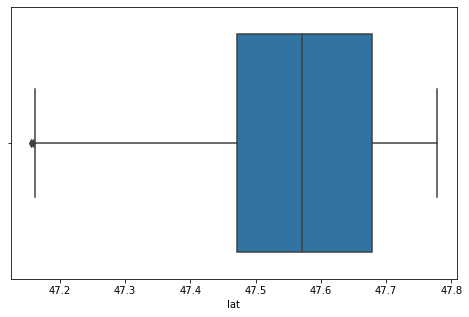

 
If the instances lie between 47.1605 and 47.9885 then they are not outliers
 
If the instances lie below 47.1605 or lie beyond 47.9885 then they are outliers
 
Attribute:  long
 
Description of the attribute:  long
 
count    21613.000000
mean      -122.213896
std          0.140828
min       -122.519000
25%       -122.328000
50%       -122.230000
75%       -122.125000
max       -121.315000
Name: long, dtype: float64
 
The Inter Quantile Range is:  0.20300000000000296
 
The lower boundary is:  -122.63250000000001
 
The upper boundary is:  -121.8205
 
Boxplot to detect the outliers: 


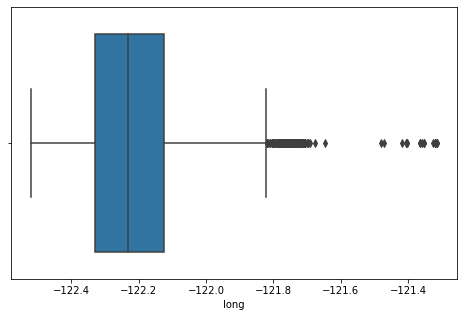

 
If the instances lie between -122.63250000000001 and -121.8205 then they are not outliers
 
If the instances lie below -122.63250000000001 or lie beyond -121.8205 then they are outliers
 
Attribute:  sqft_living15
 
Description of the attribute:  sqft_living15
 
count    21613.000000
mean      1986.552492
std        685.391304
min        399.000000
25%       1490.000000
50%       1840.000000
75%       2360.000000
max       6210.000000
Name: sqft_living15, dtype: float64
 
The Inter Quantile Range is:  870.0
 
The lower boundary is:  185.0
 
The upper boundary is:  3665.0
 
Boxplot to detect the outliers: 


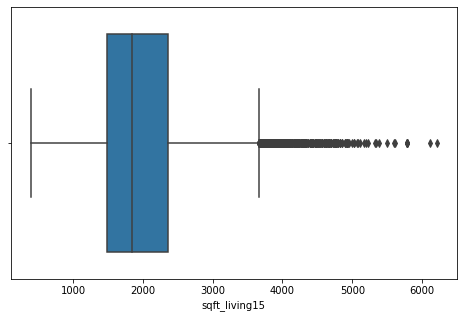

 
If the instances lie between 185.0 and 3665.0 then they are not outliers
 
If the instances lie below 185.0 or lie beyond 3665.0 then they are outliers
 
Attribute:  sqft_lot15
 
Description of the attribute:  sqft_lot15
 
count     21613.000000
mean      12768.455652
std       27304.179631
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10083.000000
max      871200.000000
Name: sqft_lot15, dtype: float64
 
The Inter Quantile Range is:  4983.0
 
The lower boundary is:  -2374.5
 
The upper boundary is:  17557.5
 
Boxplot to detect the outliers: 


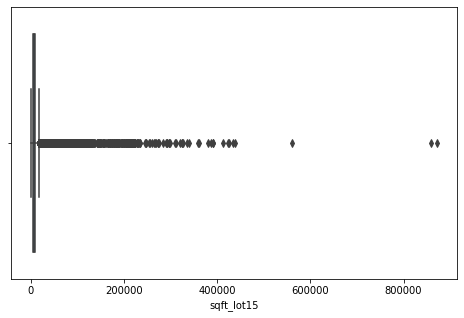

 
If the instances lie between -2374.5 and 17557.5 then they are not outliers
 
If the instances lie below -2374.5 or lie beyond 17557.5 then they are outliers
 


In [ ]:
outlier_detection(house)

**NOW OUTLIER IN EACH ATTRIBUTE TREATED USING 10TH AND 90TH PERCENTILE**

In [ ]:
def outlier_treatment(attribute):
    for i in house.columns:
        if(house[i].dtypes=='float64' or house[i].dtypes=='int64'):
            tenth_percentile=house[i].quantile(0.10)
            ninetieth_percentile=house[i].quantile(0.90)
            print("Tenth_percentile is :",tenth_percentile)
            print("Ninetieth_percentile is :",ninetieth_percentile)
            print(" ")

            house[i].where(house[i]>tenth_percentile, tenth_percentile, inplace=True)
            house[i].where(house[i]<ninetieth_percentile, ninetieth_percentile, inplace=True)

In [ ]:
outlier_treatment(house)

Tenth_percentile is : 1036000346.0
Ninetieth_percentile is : 8732028218.0
 
Tenth_percentile is : 245000.0
Ninetieth_percentile is : 887000.0
 
Tenth_percentile is : 2.0
Ninetieth_percentile is : 4.0
 
Tenth_percentile is : 1.0
Ninetieth_percentile is : 3.0
 
Tenth_percentile is : 1090.0
Ninetieth_percentile is : 3250.0
 
Tenth_percentile is : 3322.2000000000003
Ninetieth_percentile is : 21397.599999999995
 
Tenth_percentile is : 1.0
Ninetieth_percentile is : 2.0
 
Tenth_percentile is : 0.0
Ninetieth_percentile is : 0.0
 
Tenth_percentile is : 0.0
Ninetieth_percentile is : 0.0
 
Tenth_percentile is : 3.0
Ninetieth_percentile is : 4.0
 
Tenth_percentile is : 6.0
Ninetieth_percentile is : 9.0
 
Tenth_percentile is : 970.0
Ninetieth_percentile is : 2950.0
 
Tenth_percentile is : 0.0
Ninetieth_percentile is : 970.0
 
Tenth_percentile is : 1926.0
Ninetieth_percentile is : 2007.0
 
Tenth_percentile is : 0.0
Ninetieth_percentile is : 0.0
 
Tenth_percentile is : 98008.0
Ninetieth_percentile is

**AFTER OUTLIER TREATMENT VISUALIZATION**

In [ ]:
def after_treatment(attribute):
    for i in house.columns:
        if(house[i].dtypes=='float64' or house[i].dtypes=='int64'):
            print("Description of the attribute after outlier treatment: ",i)
            print(" ")
            print(house[i].describe())
            print(" ")

            fig=plt.figure(figsize=(8,5))
            sns.boxplot(x=house[i])
            print("Boxplot after outlier treatment: ")
            plt.show()
            print(" ")

Description of the attribute after outlier treatment:  id
 
count    2.161300e+04
mean     4.576804e+09
std      2.714531e+09
min      1.036000e+09
25%      2.123049e+09
50%      3.904930e+09
75%      7.308900e+09
max      8.732028e+09
Name: id, dtype: float64
 
Boxplot after outlier treatment: 


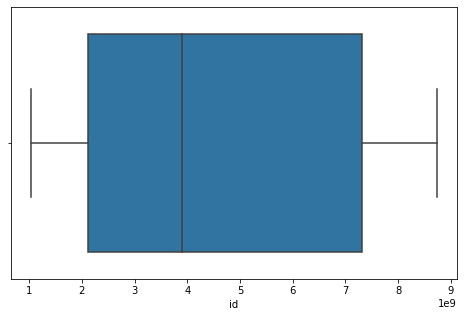

 
Description of the attribute after outlier treatment:  price
 
count     21613.000000
mean     498560.875445
std      207730.673987
min      245000.000000
25%      321950.000000
50%      450000.000000
75%      645000.000000
max      887000.000000
Name: price, dtype: float64
 
Boxplot after outlier treatment: 


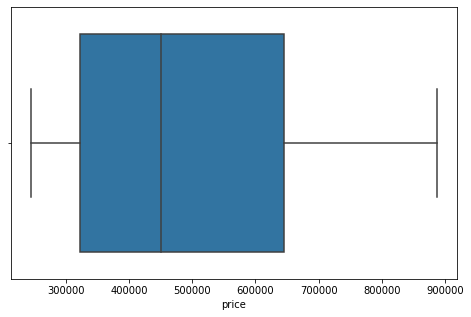

 
Description of the attribute after outlier treatment:  bedrooms
 
count    21613.000000
mean         3.270439
std          0.687272
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: bedrooms, dtype: float64
 
Boxplot after outlier treatment: 


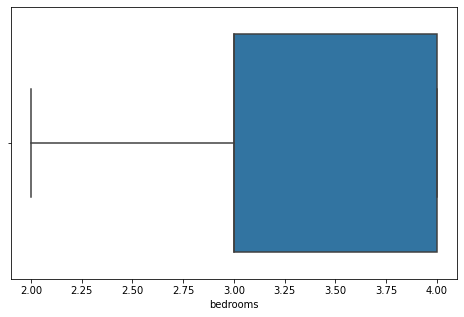

 
Description of the attribute after outlier treatment:  bathrooms
 
count    21613.000000
mean         2.059721
std          0.652005
min          1.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          3.000000
Name: bathrooms, dtype: float64
 
Boxplot after outlier treatment: 


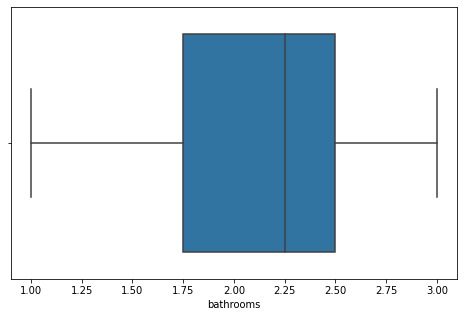

 
Description of the attribute after outlier treatment:  sqft_living
 
count    21613.000000
mean      2021.514413
std        700.070345
min       1090.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max       3250.000000
Name: sqft_living, dtype: float64
 
Boxplot after outlier treatment: 


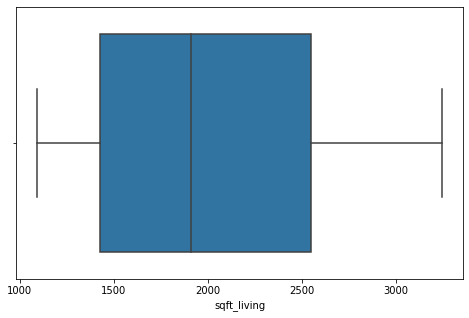

 
Description of the attribute after outlier treatment:  sqft_lot
 
count    21613.000000
mean      9079.487420
std       5391.679557
min       3322.200000
25%       5040.000000
50%       7618.000000
75%      10688.000000
max      21397.600000
Name: sqft_lot, dtype: float64
 
Boxplot after outlier treatment: 


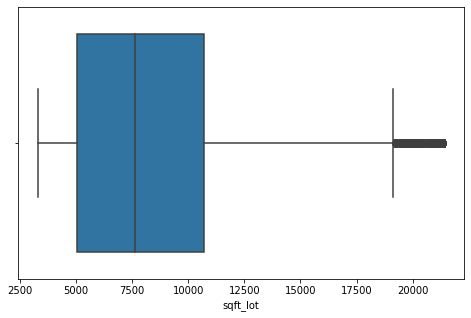

 
Description of the attribute after outlier treatment:  floors
 
count    21613.000000
mean         1.461667
std          0.475865
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          2.000000
Name: floors, dtype: float64
 
Boxplot after outlier treatment: 


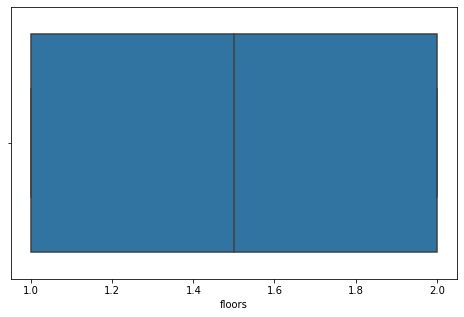

 
Description of the attribute after outlier treatment:  waterfront
 
count    21613.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: waterfront, dtype: float64
 
Boxplot after outlier treatment: 


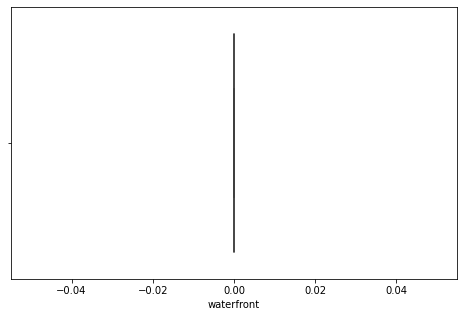

 
Description of the attribute after outlier treatment:  view
 
count    21613.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: view, dtype: float64
 
Boxplot after outlier treatment: 


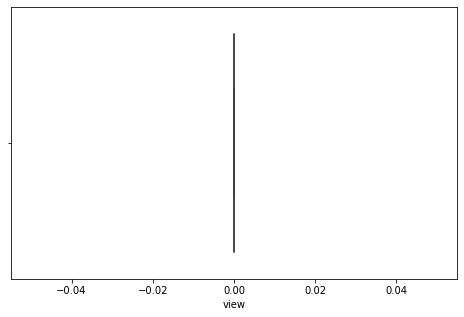

 
Description of the attribute after outlier treatment:  condition
 
count    21613.000000
mean         3.341461
std          0.474211
min          3.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: condition, dtype: float64
 
Boxplot after outlier treatment: 


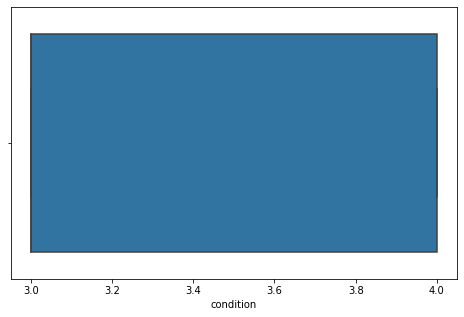

 
Description of the attribute after outlier treatment:  grade
 
count    21613.000000
mean         7.567112
std          0.923552
min          6.000000
25%          7.000000
50%          7.000000
75%          8.000000
max          9.000000
Name: grade, dtype: float64
 
Boxplot after outlier treatment: 


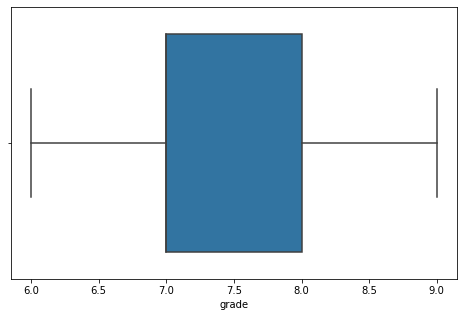

 
Description of the attribute after outlier treatment:  sqft_above
 
count    21613.000000
mean      1738.347569
std        649.663693
min        970.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       2950.000000
Name: sqft_above, dtype: float64
 
Boxplot after outlier treatment: 


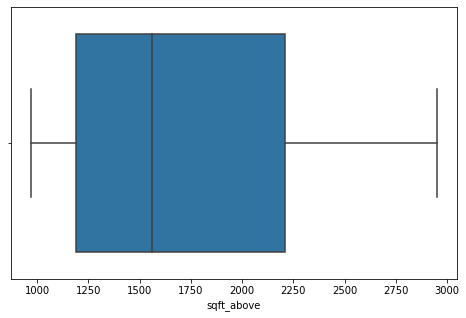

 
Description of the attribute after outlier treatment:  sqft_basement
 
count    21613.000000
mean       261.190302
std        366.628635
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max        970.000000
Name: sqft_basement, dtype: float64
 
Boxplot after outlier treatment: 


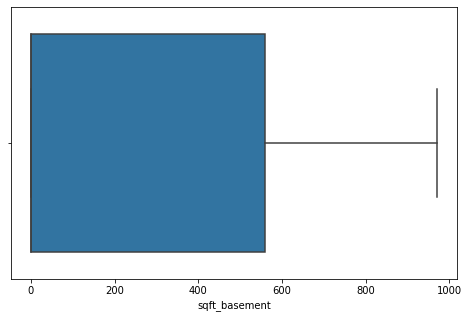

 
Description of the attribute after outlier treatment:  yr_built
 
count    21613.000000
mean      1971.781798
std         26.660855
min       1926.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2007.000000
Name: yr_built, dtype: float64
 
Boxplot after outlier treatment: 


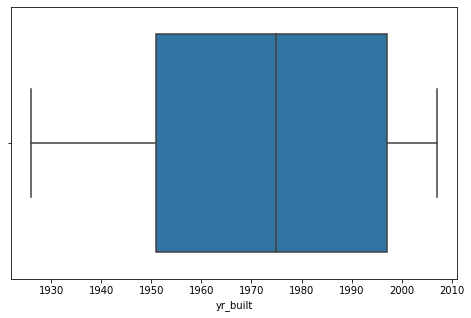

 
Description of the attribute after outlier treatment:  yr_renovated
 
count    21613.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: yr_renovated, dtype: float64
 
Boxplot after outlier treatment: 


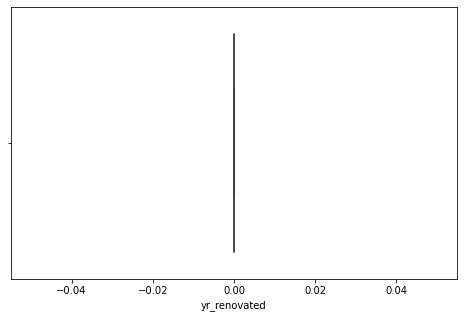

 
Description of the attribute after outlier treatment:  zipcode
 
count    21613.000000
mean     98076.072133
std         48.840294
min      98008.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98155.000000
Name: zipcode, dtype: float64
 
Boxplot after outlier treatment: 


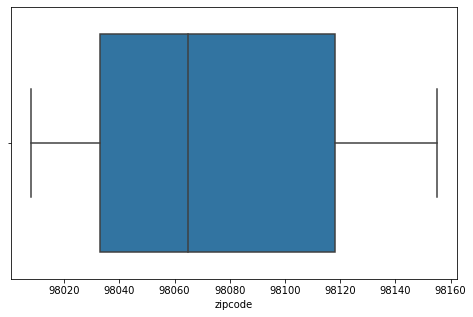

 
Description of the attribute after outlier treatment:  lat
 
count    21613.000000
mean        47.562687
std          0.125909
min         47.350300
25%         47.471000
50%         47.571800
75%         47.678000
max         47.727900
Name: lat, dtype: float64
 
Boxplot after outlier treatment: 


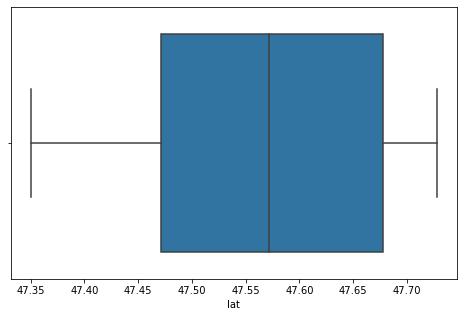

 
Description of the attribute after outlier treatment:  long
 
count    21613.000000
mean      -122.220329
std          0.119271
min       -122.372000
25%       -122.328000
50%       -122.230000
75%       -122.125000
max       -122.022000
Name: long, dtype: float64
 
Boxplot after outlier treatment: 


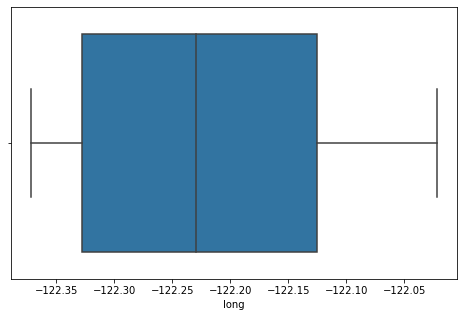

 
Description of the attribute after outlier treatment:  sqft_living15
 
count    21613.000000
mean      1949.852172
std        545.255160
min       1256.000000
25%       1490.000000
50%       1840.000000
75%       2360.000000
max       2930.000000
Name: sqft_living15, dtype: float64
 
Boxplot after outlier treatment: 


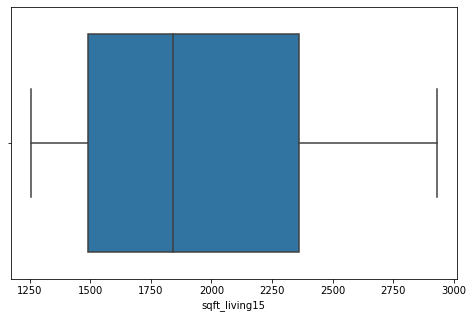

 
Description of the attribute after outlier treatment:  sqft_lot15
 
count    21613.000000
mean      8474.390968
std       4232.840455
min       3666.600000
25%       5100.000000
50%       7620.000000
75%      10083.000000
max      17852.400000
Name: sqft_lot15, dtype: float64
 
Boxplot after outlier treatment: 


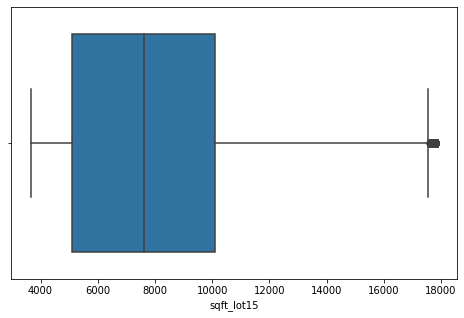

In [ ]:
after_treatment(house)

# NORMALIZATION 

**MIN MAX SCALING - RANGE : (0,1)**

In [ ]:
house_norm=house.copy()
house_norm.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,245000.0,3,1.00,1180,5650.0,1.0,0,0,...,7,1180,0,1955,0,98155,47.5112,-122.257,1340,5650.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,7,2170,400,1951,0,98125,47.7210,-122.319,1690,7639.0
2,5631500400,20150225T000000,245000.0,2,1.00,1090,10000.0,1.0,0,0,...,6,970,0,1933,0,98028,47.7279,-122.233,2720,8062.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.372,1360,5000.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503.0


In [ ]:
def minmax_scale(attribute):
    
    x_min = min(attribute,key=lambda x:float(x))
    x_max = max(attribute,key=lambda x:float(x))
    norm=[]
    for i in attribute:
        x_dash=(i-x_min)/(x_max-x_min)
        norm.append(x_dash)
        attribute.replace(i,x_dash,inplace=True)
    print("Some normalized values: ",norm[:10])
    print(" ")
        
    print("Scatterplot of normalized values:")
    
    fig=plt.figure(figsize=(10,10))
    sns.scatterplot(x=norm,y=house.index,color='m',marker='*')

Some normalized values:  [0.0, 0.45638629283489096, -0.38161993769470404, 0.559190031152648, 0.4127725856697819, 1.0, 0.019470404984423675, 0.07297507788161994, -0.381620532118283, 0.12149532710280374]
 
Scatterplot of normalized values:


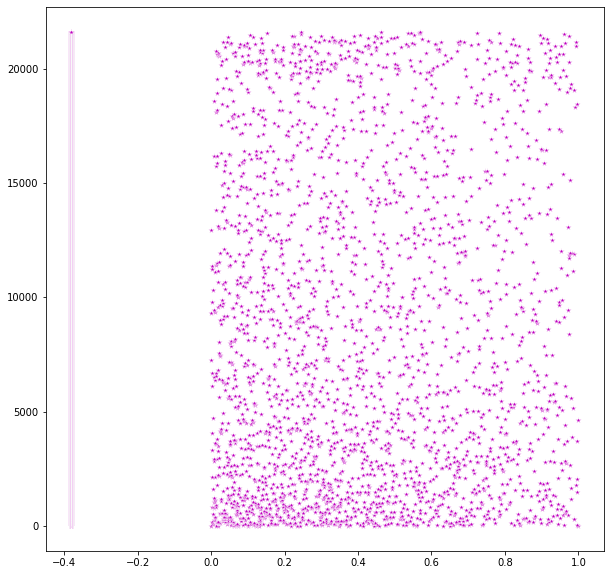

In [ ]:
# SAMPLE PLOT FOR ATTRIBUTE 'PRICE' : NORMALIZATION 
minmax_scale(house_norm['price'])

In [ ]:
house_norm

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,-0.381621,3,1.00,1180,5650.0,1.0,0,0,...,7,1180,0,1955,0,98155,47.5112,-122.257,1340,5650.0
1,6414100192,20141209T000000,-0.381621,3,2.25,2570,7242.0,2.0,0,0,...,7,2170,400,1951,0,98125,47.7210,-122.319,1690,7639.0
2,5631500400,20150225T000000,-0.381621,2,1.00,1090,10000.0,1.0,0,0,...,6,970,0,1933,0,98028,47.7279,-122.233,2720,8062.0
3,2487200875,20141209T000000,-0.381621,4,3.00,1960,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.372,1360,5000.0
4,1954400510,20150218T000000,-0.381621,3,2.00,1680,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,1036000346,20140521T000000,-0.381621,3,2.50,1530,3322.2,2.0,0,0,...,8,1530,0,2007,0,98103,47.6993,-122.346,1530,3666.6
21609,6600060120,20150223T000000,-0.381621,4,2.50,2310,5813.0,2.0,0,0,...,8,2310,0,2007,0,98146,47.5107,-122.362,1830,7200.0
21610,1523300141,20140623T000000,0.244706,2,1.00,1090,3322.2,2.0,0,0,...,7,1020,0,2007,0,98144,47.5944,-122.299,1256,3666.6
21611,1036000346,20150116T000000,-0.381621,3,2.50,1600,3322.2,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,3666.6


# MODEL BUILDING AND HYPER PARAMETER TUNING

**DROPING DATE AND ID**

In [ ]:
house.drop('date',axis=1,inplace=True)

In [ ]:
house.drop('id',axis=1,inplace=True)

**RANDOM FOREST REGRESSOR**

In [ ]:
# RANDOM FOREST REGRESSOR 

x=house.drop('price',axis=1)
y=house['price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.10)

In [ ]:
rfr_model=RandomForestRegressor(n_estimators=200)
rfr_model.fit(x_train,y_train)
print("Random Forest: ",rfr_model.score(x_test,y_test))

Random Forest:  0.8899202077312407


In [ ]:
l=[i for i in range(1,101)]
kfold = KFold(n_splits=10, random_state=None)
parameter= {"max_depth": [2,7,9,11,13,15,None],
              "max_features":['auto', 'sqrt', 'log2',None],
              "max_leaf_nodes":l,
              'min_samples_leaf':l}
rfr_model1= RandomForestRegressor()
rfr_model1_tuning= RandomizedSearchCV(rfr_model1, parameter, cv = 5)
  
rfr_model1_tuning.fit(x_train, y_train)
print("Tuned Random forest classifier Parameters: {}".format(rfr_model1_tuning.best_params_))
print("Best score is {}".format(rfr_model1_tuning.best_score_))

Tuned Random forest classifier Parameters: {'min_samples_leaf': 21, 'max_leaf_nodes': 75, 'max_features': 'auto', 'max_depth': 11}
Best score is 0.8440442222786213


**DECISION TREE REGRESSOR**

In [ ]:
l=[i for i in range(1,101)]
kfold1 = KFold(n_splits=10, random_state=None)
parameter1= {"max_depth":l,
             "criterion":["squared_error","friedman_mse","absolute_error","poisson"],
             "splitter":['best','random'],
             "max_leaf_nodes":l,
             "min_samples_leaf":l}
dec_tree=DecisionTreeRegressor()
dec_tree_tuning= RandomizedSearchCV(dec_tree, parameter1, cv = 5) 
dec_tree_tuning.fit(x_train, y_train)
print("Tuned Random forest classifier Parameters: {}".format(dec_tree_tuning.best_params_))
print("Best score is {}".format(dec_tree_tuning.best_score_))

Tuned Random forest classifier Parameters: {'splitter': 'best', 'min_samples_leaf': 35, 'max_leaf_nodes': 66, 'max_depth': 42, 'criterion': 'squared_error'}
Best score is 0.8068327196550896


# MACHINE LEARNING ALGORITHM

In [ ]:
accuracy=[]
model=[]
with_pca=[]
mse=[]

In [ ]:
x=house.drop('price',axis=1)
y=house['price']

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x,y,test_size=0.10)

**DECISION TREE**

In [ ]:

decision_tree=DecisionTreeRegressor(min_samples_leaf=.01)
decision_tree.fit(x_train1,y_train1)
y_preds=decision_tree.predict(x_test1)
accuracy.append(r2_score(y_test1,y_preds)*100)
model.append('Decision Tree')
with_pca.append(0)
mse.append(mean_squared_error(y_test1,y_preds))
print("Accuracy of Decision Tree Regressor without PCA: ",r2_score(y_test1,y_preds)*100)
print("The mean squared error of Decision tree regressor without pca is: ",mean_squared_error(y_test1,y_preds))
print(" ")

Accuracy of Decision Tree Regressor without PCA:  80.41872903515707
The mean squared error of Decision tree regressor without pca is:  8447306952.786092
 


In [ ]:
df=pd.DataFrame({'y':y_test1,'y_predicted':y_preds})
df

,y,y_predicted
13180,335000.0,380774.600000
19315,539950.0,642008.250951
5902,887000.0,877226.838235
15546,295000.0,276797.359712
13964,720000.0,510214.883249
...,...,...
8472,452000.0,464674.857520
11406,387500.0,549503.661692
19803,715000.0,738661.015385
6815,473975.0,589866.760234


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


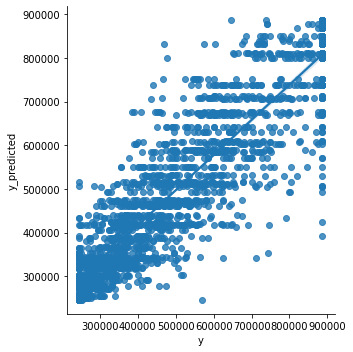

In [ ]:
sns.lmplot('y','y_predicted',data=df)

**LINEAR REGRESSION**

In [ ]:

mlrm =LinearRegression()
mlrm.fit(x_train1, y_train1)
y_preds1= mlrm.predict(x_test1)
print("the accuracy of linear regression model without PCA is: ",r2_score(y_test1,y_preds1)*100)
print("The mean squared error of Linear regression without pca is: ", mean_squared_error(y_test1,y_preds1))
model.append('Linear regression')
with_pca.append(0)
mse.append(mean_squared_error(y_test1,y_preds1))
accuracy.append(r2_score(y_test1,y_preds1)*100)

the accuracy of linear regression model without PCA is:  70.87382988725246
The mean squared error of Linear regression without pca is:  12564950443.88025


In [ ]:
df1=pd.DataFrame({'y':y_test1,'y_predicted':y_preds1})
df1

,y,y_predicted
13180,335000.0,482773.114126
19315,539950.0,621434.416913
5902,887000.0,712207.869901
15546,295000.0,291920.720714
13964,720000.0,360824.786288
...,...,...
8472,452000.0,422733.291968
11406,387500.0,588374.171668
19803,715000.0,697125.124283
6815,473975.0,546996.840387


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


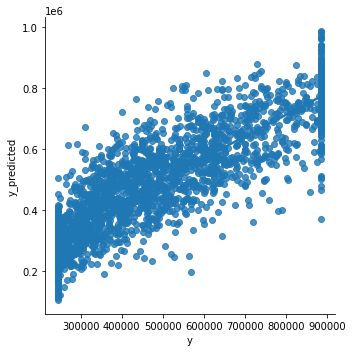

In [ ]:
sns.lmplot('y','y_predicted',data=df1)

**KNN REGRESSOR**

In [ ]:
neigh= KNeighborsRegressor(n_neighbors=3)
neigh.fit(x_train1, y_train1)
y_preds2= neigh.predict(x_test1)
print("the accuracy of this model is: ",r2_score(y_test1,y_preds2)*100)
print("The mean squared error of KNN regressor without pca is: ", mean_squared_error(y_test1,y_preds2))
model.append('KNN regressor')
with_pca.append(0)
mse.append(mean_squared_error(y_test1,y_preds2))
accuracy.append(r2_score(y_test1,y_preds2)*100)

the accuracy of this model is:  45.63832306039017
The mean squared error of KNN regressor without pca is:  23451479344.80671


In [ ]:
df2=pd.DataFrame({'y':y_test1,'y_predicted':y_preds2})
df2

,y,y_predicted
13180,335000.0,444333.333333
19315,539950.0,521666.666667
5902,887000.0,887000.000000
15546,295000.0,319983.333333
13964,720000.0,364466.666667
...,...,...
8472,452000.0,518000.000000
11406,387500.0,540833.333333
19803,715000.0,774000.000000
6815,473975.0,445666.666667


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


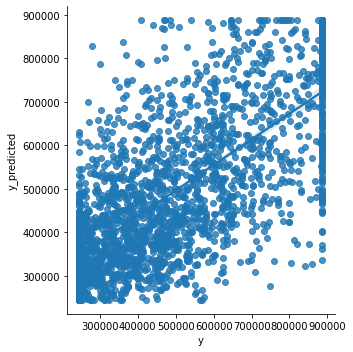

In [ ]:
sns.lmplot('y','y_predicted',data=df2)

# PCA & BAGGING

In [ ]:

from sklearn.decomposition import PCA


In [ ]:
pca = PCA(n_components =9)
x = pca.fit_transform(x)

**DECISION TREE : PCA & BAGGING**

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x,y,test_size=0.10)

In [ ]:
decision_tree1=DecisionTreeRegressor()
num=90
model1= BaggingRegressor(base_estimator=decision_tree1, n_estimators=num)
model1.fit(x_train2,y_train2)
y_preds3=model1.predict(x_test2)
print('Accuracy of Decision Tree Classifier is ',r2_score(y_test2,y_preds3)*100)
print("the mean squared error of the decision tree classifier with PCA and bagging is: ",mean_squared_error(y_test2,y_preds3))
mse.append(mean_squared_error(y_test2,y_preds3))
model.append('Decision Tree')
with_pca.append(1)
accuracy.append(r2_score(y_test2,y_preds3)*100)

Accuracy of Decision Tree Classifier is  71.08983756583322
the mean squared error of the decision tree classifier with PCA and bagging is:  12757464804.860083


In [ ]:
df3=pd.DataFrame({'y':y_test2,'y_predicted':y_preds3})
df3

,y,y_predicted
9643,550000.0,569054.866667
6904,349900.0,446032.511111
10239,257000.0,313146.111111
3869,887000.0,632151.977778
18260,493000.0,641200.000000
...,...,...
10467,359000.0,492550.233333
17460,245000.0,273477.777778
1580,380000.0,508096.288889
11433,245000.0,288160.833333


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


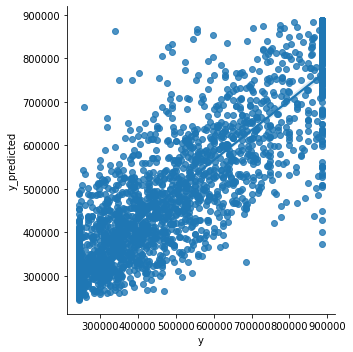

In [ ]:
sns.lmplot('y','y_predicted',data=df3)

**LINEAR REGRESSION : PCA & BAGGING**

In [ ]:
mlrm1=LinearRegression()
num1=90
model2= BaggingRegressor(base_estimator=mlrm1, n_estimators=num1)
model2.fit(x_train2, y_train2)
y_preds4= model2.predict(x_test2)
print('Accuracy of linear regression method is ',r2_score(y_test2,y_preds4)*100)
print("the mean squared error of the decision tree classifier with PCA and bagging is: ",mean_squared_error(y_test2,y_preds4))
mse.append(mean_squared_error(y_test2,y_preds4))
model.append('Linear regression')
with_pca.append(1)
accuracy.append(r2_score(y_test2,y_preds4)*100)

Accuracy of linear regression method is  62.57315562583131
the mean squared error of the decision tree classifier with PCA and bagging is:  16515702772.259222


In [ ]:
df4=pd.DataFrame({'y':y_test2,'y_predicted':y_preds4})
df4

,y,y_predicted
9643,550000.0,593768.317167
6904,349900.0,509862.854890
10239,257000.0,423815.793541
3869,887000.0,730099.961913
18260,493000.0,553112.645903
...,...,...
10467,359000.0,564024.130144
17460,245000.0,297004.647059
1580,380000.0,521816.627734
11433,245000.0,350533.639788


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


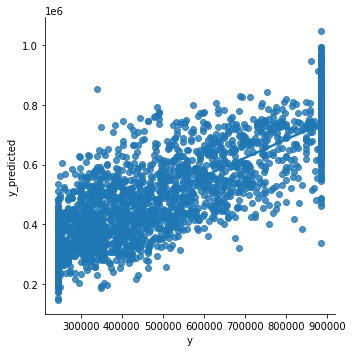

In [ ]:
sns.lmplot('y','y_predicted',data=df4)

**KNN : PCA & BAGGING**

In [ ]:
neigh1= KNeighborsRegressor(n_neighbors=3)
num2=90
model3= BaggingRegressor(base_estimator=neigh1, n_estimators=num2)
model3.fit(x_train2, y_train2)
y_preds5= model3.predict(x_test2)
print("the accuracy of this model is: ",r2_score(y_test2,y_preds5)*100)
print("The mean squared error of KNN regressor without pca is: ", mean_squared_error(y_test2,y_preds5))
model.append('KNN regressor')
with_pca.append(1)
mse.append(mean_squared_error(y_test2,y_preds5))
accuracy.append(r2_score(y_test2,y_preds5)*100)

the accuracy of this model is:  52.131426279732416
The mean squared error of KNN regressor without pca is:  21123424881.67568


In [ ]:
df5=pd.DataFrame({'y':y_test2,'y_predicted':y_preds5})
df5

,y,y_predicted
9643,550000.0,477110.000000
6904,349900.0,570560.370370
10239,257000.0,345620.370370
3869,887000.0,582686.666667
18260,493000.0,695218.518519
...,...,...
10467,359000.0,425788.518519
17460,245000.0,333857.407407
1580,380000.0,409914.814815
11433,245000.0,298508.148148


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


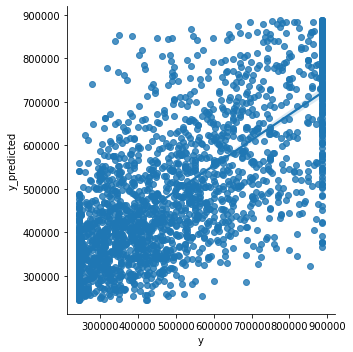

In [ ]:
sns.lmplot('y','y_predicted',data=df5)

In [ ]:
df6=pd.DataFrame()
df6['model']=model
df6['with_pca']=with_pca
df6['accuracy']=accuracy
df6['mean_squared_error']=mse
df6

,model,with_pca,accuracy,mean_squared_error
0,Decision Tree,0,80.418729,8.447307e+09
1,Linear regression,0,70.873830,1.256495e+10
2,KNN regressor,0,45.638323,2.345148e+10
3,Decision Tree,1,71.089838,1.275746e+10
4,Linear regression,1,62.573156,1.651570e+10
5,KNN regressor,1,52.131426,2.112342e+10


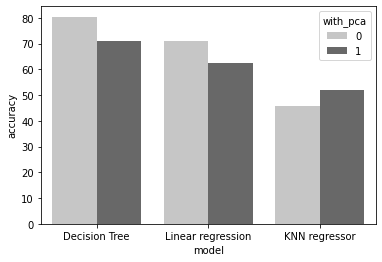

In [ ]:
sns.barplot(x=df6['model'],y=df6['accuracy'],hue=df6['with_pca'],palette='Greys')

# BOOSTING

**ADA BOOSTING**

In [ ]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x,y,test_size=0.10)

In [ ]:
a = AdaBoostRegressor()
a.fit(x_train3,y_train3)
y_preds6=a.predict(x_test3)
print("the accuracy of ada boosting regressor is: ",r2_score(y_test3,y_preds6)*100)
print("The mean squared error of ada boosting regressor without pca is: ", mean_squared_error(y_test3,y_preds6))

the accuracy of ada boosting regressor is:  53.57170005959174
The mean squared error of ada boosting regressor without pca is:  20525941749.636974


**ADA BOOSTING WITH PCA**

In [ ]:
a1= AdaBoostRegressor()
a1.fit(x_train2,y_train2)
y_preds7=a1.predict(x_test2)
print("the accuracy of ada boosting regressor is: ",r2_score(y_test2,y_preds7)*100)
print("The mean squared error of ada boosting regressor with pca is: ", mean_squared_error(y_test2,y_preds7))

the accuracy of ada boosting regressor is:  56.3488473788736
The mean squared error of ada boosting regressor with pca is:  19262363002.065434


**GRADIENT BOOST REGRESSOR WITHOUT PCA**

In [ ]:
g= AdaBoostRegressor()
g.fit(x_train3,y_train3)
y_preds8=g.predict(x_test3)
print("the accuracy of this model is: ",r2_score(y_test3,y_preds8)*100)
print("The mean squared error of gradient boosting regressor without pca is: ", mean_squared_error(y_test3,y_preds8))

the accuracy of this model is:  53.78762876286631
The mean squared error of gradient boosting regressor without pca is:  20430479714.818188


**GRADIENT BOOST REGRESSOR WITH PCA**

In [ ]:
g1= AdaBoostRegressor()
g1.fit(x_train2,y_train2)
y_preds9=g1.predict(x_test2)
print("the accuracy of this model is: ",r2_score(y_test2,y_preds9)*100)
print("The mean squared error of Gradient boosting regressor with pca is: ", mean_squared_error(y_test2,y_preds9))

the accuracy of this model is:  54.23019039181154
The mean squared error of Gradient boosting regressor with pca is:  20197283101.790363
